(a) Use an existing library to separate the three channels of your RGB image and show
each of them separately.


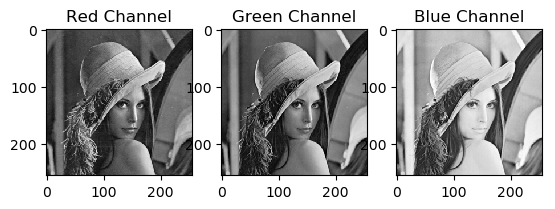

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('Lena.png')

# Split the image into R, G, and B channels
r, g, b = cv2.split(image)

# Display the channels
plt.subplot(131)
plt.imshow(r, cmap='gray')
plt.title('Red Channel')

plt.subplot(132)
plt.imshow(g, cmap='gray')
plt.title('Green Channel')

plt.subplot(133)
plt.imshow(b, cmap='gray')
plt.title('Blue Channel')

plt.show()

(b) Write your own algorithm to separate an RGB image into the three channels of the
HSL color space (H, S, L). See https://www.rapidtables.com/convert/color/
rgb-to-hsl.html

convert RGB image into its corresponding HSL (Hue, Saturation, Lightness) color space representation. It does this by iterating through each pixel in the image and performing the following steps for each pixel:

1.Extract the RGB values for the pixel and scale them to the range [0, 1].

2.Use the colorsys.rgb_to_hls function to convert the scaled RGB values to HSL values (Hue, Saturation, Lightness).

3.Store the calculated HSL values in the output HSL image.

4.Scale the HSL values back to the range [0, 255] and convert them to 8-bit unsigned integers (uint8) to match typical image representations.

In [9]:
import colorsys

def rgb_to_hsl(image):
    hsl_image = np.empty_like(image, dtype=np.float64)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            r, g, b = image[i, j] / 255.0
            h, s, l = colorsys.rgb_to_hls(r, g, b)
            hsl_image[i, j] = [h, s, l]
    return (hsl_image * 255).astype(np.uint8)

(c) Write your own algorithm to reconstruct an RGB image from the H, S, L channels.
See https://www.rapidtables.com/convert/color/hsl-to-rgb.html

I scale h,s,l to the expected normalized ranges before using colorsys.hlt_to_rgb to convert to RGB.

360 represents the maximum value for the Hue component in the HSL color space. Hue is typically measured in degrees, and the valid range is [0, 360 degrees]. In the code, h is divided by 360 to scale it to the [0, 1] range, as the colorsys.hls_to_rgb function expects the Hue value to be normalized to this range.

100 represents the maximum value for the Saturation and Lightness components in the HSL color space. Saturation and Lightness are often expressed as percentages, and the valid range for both is [0, 100]. In the code, s and l are divided by 100 to scale them to the [0, 1] range, as the colorsys.hls_to_rgb function also expects these values to be in this normalized range.

In [10]:
def hsl_to_rgb(image):
    rgb_image = np.empty_like(image, dtype=np.uint8)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            h, s, l = image[i, j] / [360, 100, 100]
            r, g, b = colorsys.hls_to_rgb(h, l, s)
            rgb_image[i, j] = [int(r * 255), int(g * 255), int(b * 255)]
    return rgb_image

(a) Write your own histogram equalization algorithm based on the method presented in
the lecture.

1.histogram_equalization is a function that takes a grayscale image (gray_image) as input and returns an equalized grayscale image.

2.The code calculates the histogram (hist) of the input grayscale image using the np.histogram function. The histogram represents the frequency of occurrence of each intensity level (from 0 to 255).

3.cdf (cumulative distribution function) is computed as the cumulative sum of the histogram. The CDF represents the cumulative probability of pixel intensities.

4.cdf_normalized is calculated by scaling the CDF values so that they span the entire intensity range (0 to 255). This scaling ensures that the highest CDF value corresponds to the maximum intensity level.

5.The actual histogram equalization is performed using np.interp. It maps the input grayscale image (gray_image) to the CDF values (cdf_normalized) to redistribute the pixel intensities.

6.Finally, the equalized image is returned as an 8-bit unsigned integer image (np.uint8), ensuring that the intensity values are in the [0, 255] range.

In [11]:
def histogram_equalization(gray_image):
    hist, bins = np.histogram(gray_image.flatten(), 256, [0, 256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max() / cdf.max()
    
    equalized_image = np.interp(gray_image, bins[:-1], cdf_normalized)
    return equalized_image.astype(np.uint8)

b) Apply your algorithm on the greyscale images provided on ILIAS.

Equalized and saved: Equalized_images\Aeroplane.png
Equalized and saved: Equalized_images\Ara.png
Equalized and saved: Equalized_images\Baboon.png
Equalized and saved: Equalized_images\Beetle.png
Equalized and saved: Equalized_images\Cervin.png
Equalized and saved: Equalized_images\Chateau.png
Equalized and saved: Equalized_images\Coliseum.png
Equalized and saved: Equalized_images\Hibiscus.png
Equalized and saved: Equalized_images\Lena.png
Equalized and saved: Equalized_images\Peppers.png
Equalized and saved: Equalized_images\Sharbatgula.png
Equalized and saved: Equalized_images\Stop.png


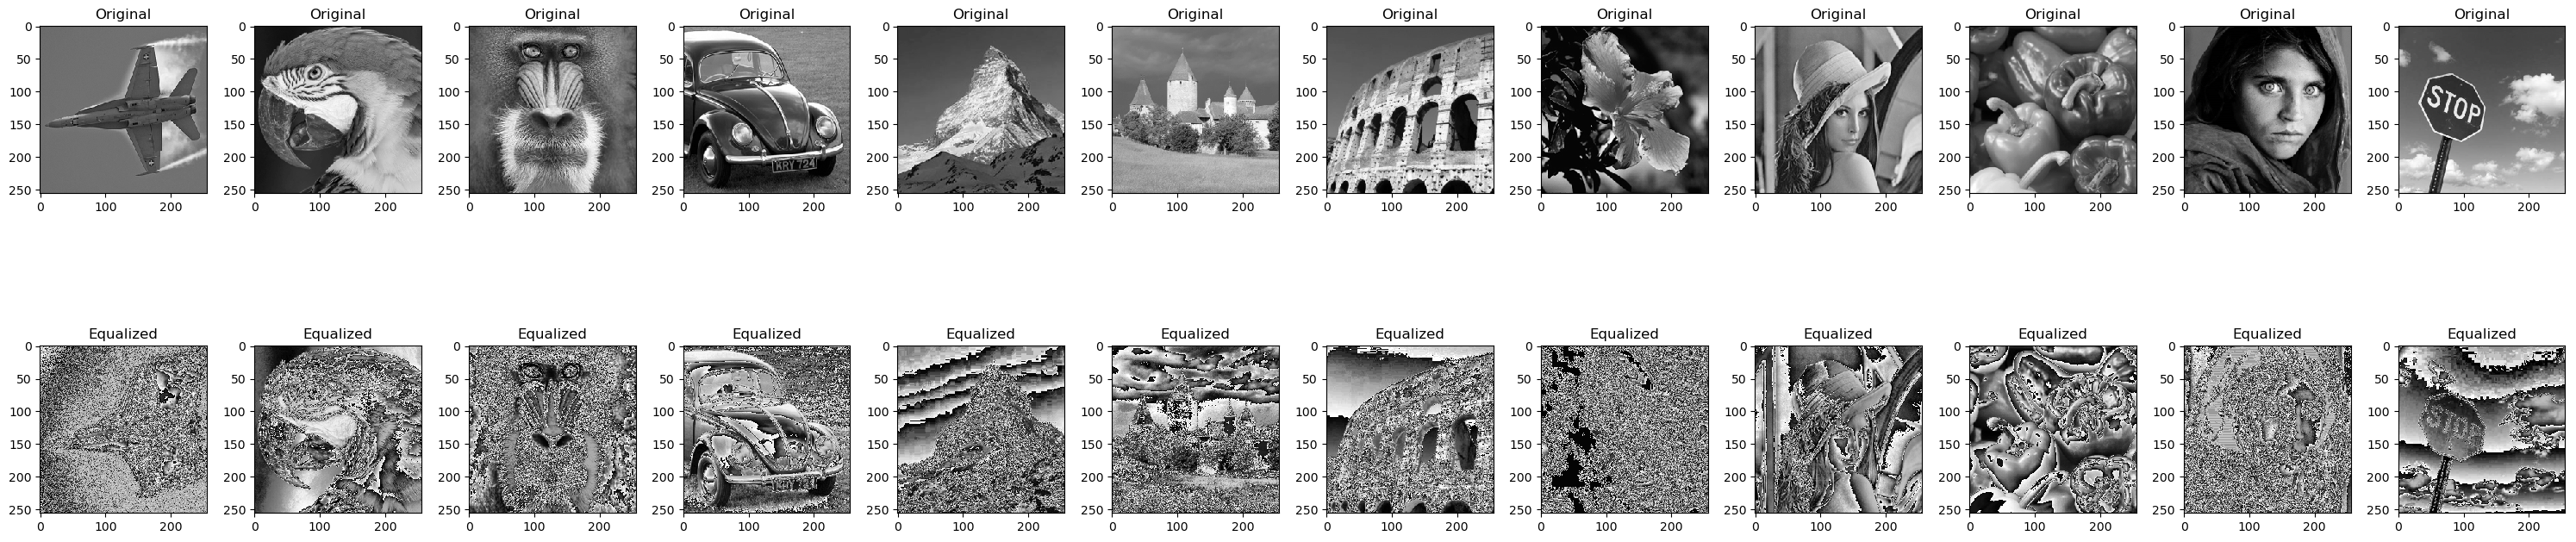

Histogram equalization of grayscale images completed.


In [12]:
import os
import cv2
import numpy as np

folder_path = 'Images_greyscale'

output_folder = 'Equalized_images'
os.makedirs(output_folder, exist_ok=True)


image_files = os.listdir(folder_path)

plt.figure(figsize=(30, 15))


for idx, image_file in enumerate(image_files):

    image_path = os.path.join(folder_path, image_file)
    gray_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    equalized_image = histogram_equalization(gray_image)


    plt.subplot(4, len(image_files), idx + 1)
    plt.imshow(gray_image, cmap='gray')
    plt.title('Original')


    plt.subplot(4, len(image_files), idx + 1 + len(image_files))
    plt.imshow(equalized_image, cmap='gray')
    plt.title('Equalized')


    output_path = os.path.join(output_folder, image_file)
    cv2.imwrite(output_path, equalized_image)

    print(f"Equalized and saved: {output_path}")

plt.tight_layout()
plt.show()

print("Histogram equalization of grayscale images completed.")


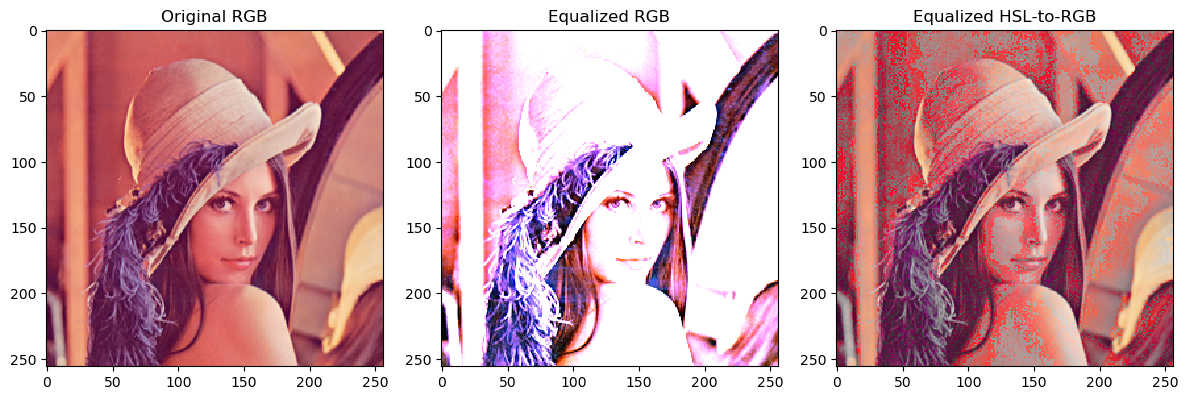

Histogram equalization of the Lena image completed.


In [13]:
import cv2
import numpy as np
import colorsys
import matplotlib.pyplot as plt


lena_image = cv2.imread('Lena.png')

# (a) Apply histogram equalization to RGB channels
def histogram_equalization_rgb(rgb_image):
    equalized_channels = []
    for channel in cv2.split(rgb_image):
        hist, bins = np.histogram(channel.flatten(), 256, [0, 256])
        cdf = hist.cumsum()
        cdf_normalized = cdf * hist.max() / cdf.max()
        equalized_channel = np.interp(channel, bins[:-1], cdf_normalized)
        equalized_channels.append(equalized_channel)
    equalized_rgb_image = cv2.merge(equalized_channels)
    return equalized_rgb_image


lena_image = cv2.convertScaleAbs(lena_image)

equalized_rgb_image = histogram_equalization_rgb(lena_image)

# (b) Apply histogram equalization to the L channel of the HSL image
def histogram_equalization_hsl(hsl_image):
    h, s, l = cv2.split(hsl_image)
    l_equalized = histogram_equalization(l)
    hsl_equalized = cv2.merge((h, s, l_equalized))
    return hsl_equalized


lena_hsl = cv2.cvtColor(lena_image, cv2.COLOR_BGR2HLS)


equalized_hsl = histogram_equalization_hsl(lena_hsl)


equalized_rgb_hsl = cv2.cvtColor(equalized_hsl, cv2.COLOR_HLS2BGR)


plt.figure(figsize=(12, 6))


plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(lena_image, cv2.COLOR_BGR2RGB))
plt.title('Original RGB')


equalized_rgb_image_display = cv2.convertScaleAbs(equalized_rgb_image)
equalized_rgb_hsl_display = cv2.convertScaleAbs(equalized_rgb_hsl)


plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(equalized_rgb_image_display, cv2.COLOR_BGR2RGB))
plt.title('Equalized RGB')


plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(equalized_rgb_hsl_display, cv2.COLOR_BGR2RGB))
plt.title('Equalized HSL-to-RGB')


plt.tight_layout()
plt.show()

print("Histogram equalization of the Lena image completed.")


1. I notice that equalization leads to artifacts or exaggerate noise in the image. 
2. When we equalize the RGB image directly, we are  manipulating the color channels independently. As a result, the colors change, and the image  exhibits a different color balance